In [1]:
import pandas as pd
import evds
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
buyume=pd.read_excel("gayrisafi yurtici hasila uretim yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis hac.xls")
buyume=buyume.iloc[:34,[1,14,15,16,17]].T
buyume=buyume.iloc[:,8:]
veri=[]
for i in range(len(buyume.columns)):
   veri.append(buyume.iloc[:,i].values[1:])

veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1999-03-31",freq="Q",periods=len(veri)))
veri.to_excel("veri2.xlsx")

In [3]:
buyume=pd.read_excel("gayrisafi yurtici hasila uretim yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis hac.xls")
buyume=buyume.iloc[:34,[1,19,20,21,22]].T
buyume=buyume.iloc[:,8:]
veri=[]
for i in range(len(buyume.columns)):
   veri.append(buyume.iloc[:,i].values[1:])

In [4]:
veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1999-03-31",freq="Q",periods=len(veri)))
veri

,Büyüme
1999-03-31,-1.68582
1999-06-30,-0.563716
1999-09-30,-1.686618
1999-12-31,2.98742
2000-03-31,1.574851
...,...
2023-06-30,3.998077
2023-09-30,0.239144
2023-12-31,1.166981
2024-03-31,1.364591


In [5]:
perakende=pd.read_excel("perakende satis hacim endeksi ozel gruplar (2021=100).xls")
perakende=pd.DataFrame(perakende["Unnamed: 7"].dropna().iloc[2:])
perakende.columns=["Perakende Satış"]
perakende=perakende.set_index(pd.date_range(start="2010-01-31",periods=len(perakende),freq="M"))
perakende=perakende.resample("Q").mean()
perakende=perakende.pct_change()*100
perakende=perakende.dropna()
perakende

,Perakende Satış
2010-06-30,3.127696
2010-09-30,3.445146
2010-12-31,3.538052
2011-03-31,2.836909
2011-06-30,1.662329
2011-09-30,2.508372
2011-12-31,0.364650
2012-03-31,0.441838
2012-06-30,3.163399
2012-09-30,0.979058


In [6]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

In [7]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-31",freq="Q",periods=len(usd)))
usd=usd.pct_change()*100
usd=usd.dropna()
usd

,USD/TL
2006-06-30,9.336700
2006-09-30,3.109109
2006-12-31,-2.951977
2007-03-31,-3.182185
2007-06-30,-5.023656
...,...
2023-12-31,6.294589
2024-03-31,8.448607
2024-06-30,4.643019
2024-09-30,3.555937


In [8]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "31-12-2007",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','Tarih'])
kredi.columns = ['Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi=kredi.dropna()
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="M",periods=len(kredi)))
kredi=kredi.resample("Q").last()
kredi=kredi.pct_change()*100
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="Q",periods=len(kredi)))
kredi=kredi.dropna()
kredi

,Kredi
2008-03-31,8.415812
2008-06-30,8.611317
2008-09-30,6.465078
2008-12-31,0.301982
2009-03-31,-1.910862
...,...
2023-12-31,8.679346
2024-03-31,10.994405
2024-06-30,8.314221
2024-09-30,7.989234


In [9]:
params = {
    'series': "TP.KKHARTUT.KT1",
    'startDate': "31-03-2014",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kart = formatted_response['items']
kart = pd.DataFrame(kart)


kart = kart.drop(columns=['UNIXTIME','Tarih'])
kart.columns = ['Kart']
kart['Kart'] = pd.to_numeric(kart['Kart'])
kart=kart.set_index(pd.date_range(start="31-03-2014",freq="Q",periods=len(kart)))
kart=kart.pct_change()*100
kart=kart.dropna()
kart

,Kart
2014-06-30,6.763788
2014-09-30,4.445903
2014-12-31,0.341941
2015-03-31,2.981396
2015-06-30,10.861409
2015-09-30,2.101863
2015-12-31,-0.955240
2016-03-31,0.426535
2016-06-30,7.905282
2016-09-30,1.055159


In [10]:
params = {
    'series': "TP.CLI2.A01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

öncü = formatted_response['items']
öncü = pd.DataFrame(öncü)


öncü = öncü.drop(columns=['UNIXTIME','Tarih'])
öncü.columns = ['Öncü Gösterge']
öncü['Öncü Gösterge'] = pd.to_numeric(öncü['Öncü Gösterge'])
öncü=öncü.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(öncü)))
öncü=öncü.pct_change()*100
öncü=öncü.dropna()
öncü

,Öncü Gösterge
1999-06-30,1.955357
1999-09-30,-0.084654
1999-12-31,2.500876
2000-03-31,3.500171
2000-06-30,-0.173496
...,...
2023-09-30,0.763004
2023-12-31,-0.109793
2024-03-31,0.942993
2024-06-30,0.592831


In [11]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['İhracat']
ihracat['İhracat'] = pd.to_numeric(ihracat['İhracat'])
ihracat=ihracat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ihracat)))
ihracat=ihracat.pct_change()*100
ihracat=ihracat.dropna()
ihracat

,İhracat
2013-06-30,2.938221
2013-09-30,-2.843534
2013-12-31,6.008618
2014-03-31,0.797169
2014-06-30,0.069491
2014-09-30,-4.059849
2014-12-31,2.623426
2015-03-31,-6.256287
2015-06-30,-2.065737
2015-09-30,-7.425967


In [12]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['İthalat']
ithalat['İthalat'] = pd.to_numeric(ithalat['İthalat'])
ithalat=ithalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ithalat)))
ithalat=ithalat.pct_change()*100
ithalat=ithalat.dropna()
ithalat

,İthalat
2013-06-30,13.045979
2013-09-30,-6.944537
2013-12-31,2.390350
2014-03-31,-8.643594
2014-06-30,6.982644
2014-09-30,-3.016522
2014-12-31,2.233891
2015-03-31,-14.936426
2015-06-30,2.664102
2015-09-30,-8.070364


In [13]:
params = {
    'series': "TP.KTF17",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tfaiz = formatted_response['items']
tfaiz = pd.DataFrame(tfaiz)


tfaiz = tfaiz.drop(columns=['UNIXTIME','Tarih'])
tfaiz.columns = ['Ticari Faiz']
tfaiz['Ticari Faiz'] = pd.to_numeric(tfaiz['Ticari Faiz'])
tfaiz=tfaiz.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tfaiz)))
tfaiz=tfaiz.dropna()
tfaiz

,Ticari Faiz
2002-03-31,58.993077
2002-06-30,49.074615
2002-09-30,45.385385
2002-12-31,43.189231
2003-03-31,44.611538
...,...
2023-12-31,51.280769
2024-03-31,56.011538
2024-06-30,64.856923
2024-09-30,60.701538


In [14]:

params = {
    'series': "TP.TRY.MT01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz1ay = formatted_response['items']
mfaiz1ay = pd.DataFrame(mfaiz1ay)


mfaiz1ay = mfaiz1ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz1ay.columns = ['Mevduat Faiz 1Ay']
mfaiz1ay['Mevduat Faiz 1Ay'] = pd.to_numeric(mfaiz1ay['Mevduat Faiz 1Ay'])
mfaiz1ay=mfaiz1ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz1ay)))
mfaiz1ay=mfaiz1ay.dropna()
mfaiz1ay

,Mevduat Faiz 1Ay
2002-03-31,61.068462
2002-06-30,51.750769
2002-09-30,50.345385
2002-12-31,48.413077
2003-03-31,47.924615
...,...
2023-12-31,38.312308
2024-03-31,45.396154
2024-06-30,55.676923
2024-09-30,54.311538


In [15]:

params = {
    'series': "TP.TRY.MT02",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz3ay = formatted_response['items']
mfaiz3ay = pd.DataFrame(mfaiz3ay)


mfaiz3ay = mfaiz3ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz3ay.columns = ['Mevduat Faiz 3Ay']
mfaiz3ay['Mevduat Faiz 3Ay'] = pd.to_numeric(mfaiz3ay['Mevduat Faiz 3Ay'])
mfaiz3ay=mfaiz3ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz3ay)))
mfaiz3ay=mfaiz3ay.dropna()
mfaiz3ay

,Mevduat Faiz 3Ay
2002-03-31,59.005385
2002-06-30,50.468462
2002-09-30,50.828462
2002-12-31,48.276923
2003-03-31,47.048462
...,...
2023-12-31,47.333077
2024-03-31,53.394615
2024-06-30,63.980000
2024-09-30,59.335385


In [16]:

params = {
    'series': "TP.TSANAYMT2021.Y1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

sanayi = formatted_response['items']
sanayi = pd.DataFrame(sanayi)


sanayi = sanayi.drop(columns=['UNIXTIME','Tarih'])
sanayi.columns = ['Sanayi']
sanayi['Sanayi'] = pd.to_numeric(sanayi['Sanayi'])
sanayi=sanayi.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(sanayi)))
sanayi=sanayi.pct_change()*100
sanayi=sanayi.dropna()
sanayi

,Sanayi
2005-06-30,-0.616297
2005-09-30,3.830180
2005-12-31,2.898139
2006-03-31,1.522466
2006-06-30,1.885331
...,...
2023-09-30,0.631988
2023-12-31,-1.296895
2024-03-31,3.049898
2024-06-30,-4.058027


In [17]:

params = {
    'series': "TP.PR.ARZ13",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m2 = formatted_response['items']
m2 = pd.DataFrame(m2)


m2 = m2.drop(columns=['UNIXTIME','Tarih'])
m2.columns = ['M2']
m2['M2'] = pd.to_numeric(m2['M2'])
m2=m2.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m2)))
m2=m2.pct_change()*100
m2=m2.dropna()
m2

,M2
2006-03-31,1.554679
2006-06-30,9.638037
2006-09-30,3.877008
2006-12-31,4.679794
2007-03-31,5.001742
...,...
2023-12-31,9.904875
2024-03-31,7.259381
2024-06-30,6.092811
2024-09-30,7.933599


In [18]:

params = {
    'series': "TP.PR.ARZ22",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','Tarih'])
m3.columns = ['M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3=m3.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m3)))
m3=m3.pct_change()*100
m3=m3.dropna()
m3

,M3
2006-03-31,1.798053
2006-06-30,9.639824
2006-09-30,2.739330
2006-12-31,3.939840
2007-03-31,4.554048
...,...
2023-12-31,10.134204
2024-03-31,8.359733
2024-06-30,7.889542
2024-09-30,10.958583


In [19]:

params = {
    'series': "TP.FG.J0",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tüfe = formatted_response['items']
tüfe = pd.DataFrame(tüfe)


tüfe = tüfe.drop(columns=['UNIXTIME','Tarih'])
tüfe.columns = ['TÜFE']
tüfe['TÜFE'] = pd.to_numeric(tüfe['TÜFE'])
tüfe=tüfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tüfe)))
tüfe=tüfe.pct_change()*100
tüfe=tüfe.dropna()
tüfe

,TÜFE
2003-06-30,3.503735
2003-09-30,0.738513
2003-12-31,2.892589
2004-03-31,2.043974
2004-06-30,1.557564
...,...
2023-12-31,13.161442
2024-03-31,14.448411
2024-06-30,9.863378
2024-09-30,8.297692


In [20]:

params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
1999-06-30,12.224920
1999-09-30,10.767969
1999-12-31,15.393947
2000-03-31,16.175187
2000-06-30,7.151731
...,...
2023-12-31,8.572045
2024-03-31,9.732860
2024-06-30,9.025570
2024-09-30,5.170864


In [21]:

params = {
    'series': "TP.GY1.N2.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

reelgüven = formatted_response['items']
reelgüven = pd.DataFrame(reelgüven)


reelgüven = reelgüven.drop(columns=['UNIXTIME','Tarih'])
reelgüven.columns = ['Reel Güven']
reelgüven['Reel Güven'] = pd.to_numeric(reelgüven['Reel Güven'])
reelgüven=reelgüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(reelgüven)))
reelgüven=reelgüven.pct_change()*100
reelgüven=reelgüven.dropna()
reelgüven

,Reel Güven
2007-06-30,-3.372093
2007-09-30,0.992780
2007-12-31,-2.442657
2008-03-31,-2.992366
2008-06-30,-6.578533
...,...
2023-12-31,-0.635728
2024-03-31,-1.343570
2024-06-30,-0.648508
2024-09-30,-3.426893


In [22]:

params = {
    'series': "TP.TG2.Y01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tuketicigüven = formatted_response['items']
tuketicigüven = pd.DataFrame(tuketicigüven)


tuketicigüven = tuketicigüven.drop(columns=['UNIXTIME','Tarih'])
tuketicigüven.columns = ['Tüketici Güven']
tuketicigüven['Tüketici Güven'] = pd.to_numeric(tuketicigüven['Tüketici Güven'])
tuketicigüven=tuketicigüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tuketicigüven)))
tuketicigüven=tuketicigüven.pct_change()*100
tuketicigüven=tuketicigüven.dropna()
tuketicigüven

,Tüketici Güven
2012-06-30,-2.657194
2012-09-30,-0.096161
2012-12-31,-2.936119
2013-03-31,4.365104
2013-06-30,2.759161
2013-09-30,0.114167
2013-12-31,0.360455
2014-03-31,-3.903252
2014-06-30,4.686077
2014-09-30,-1.604023


In [23]:

params = {
    'series': "TP.KKO.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

imalat = formatted_response['items']
imalat = pd.DataFrame(imalat)


imalat = imalat.drop(columns=['UNIXTIME','Tarih'])
imalat.columns = ['İmalat PMI']
imalat['İmalat PMI'] = pd.to_numeric(imalat['İmalat PMI'])
imalat=imalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(imalat)))
imalat=imalat.pct_change()*100
imalat=imalat.dropna()
imalat

,İmalat PMI
2007-06-30,1.882931
2007-09-30,-1.366010
2007-12-31,-0.407332
2008-03-31,-0.899796
2008-06-30,0.371440
...,...
2023-12-31,0.915033
2024-03-31,-0.431779
2024-06-30,-0.346921
2024-09-30,-1.000870


In [24]:

params = {
    'series': "TP.TIG08",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

işsizlik = formatted_response['items']
işsizlik = pd.DataFrame(işsizlik)


işsizlik = işsizlik.drop(columns=['UNIXTIME','Tarih'])
işsizlik.columns = ['İşsizlik']
işsizlik['İşsizlik'] = pd.to_numeric(işsizlik['İşsizlik'])
işsizlik=işsizlik.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(işsizlik)))
işsizlik=işsizlik.dropna()
işsizlik

,İşsizlik
2014-03-31,9.400000
2014-06-30,9.700000
2014-09-30,10.066667
2014-12-31,10.400000
2015-03-31,10.566667
2015-06-30,10.300000
2015-09-30,10.133333
2015-12-31,10.266667
2016-03-31,10.166667
2016-06-30,10.366667


In [25]:

params = {
    'series': "TP.IYAW2.S19.B",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

normalsiparis = formatted_response['items']
normalsiparis = pd.DataFrame(normalsiparis)
normalsiparis=normalsiparis.dropna()

normalsiparis = normalsiparis.drop(columns=['UNIXTIME','Tarih'])
normalsiparis.columns = ['Normal Sipariş']
normalsiparis['Normal Sipariş'] = pd.to_numeric(normalsiparis['Normal Sipariş'])
normalsiparis=normalsiparis.set_index(pd.date_range(start="31-03-2007",freq="Q",periods=len(normalsiparis)))
normalsiparis=normalsiparis.pct_change()*100
normalsiparis=normalsiparis.dropna()
normalsiparis

,Normal Sipariş
2007-06-30,5.840886
2007-09-30,6.232160
2007-12-31,-6.090461
2008-03-31,4.577969
2008-06-30,-2.963976
...,...
2023-12-31,2.650705
2024-03-31,-0.583090
2024-06-30,0.209468
2024-09-30,-5.852843


In [26]:
elektrik=pd.read_excel("tramoseats.xlsx").dropna()
del elektrik["Unnamed: 0"]
elektrik=elektrik.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(elektrik)))
elektrik.columns=["Elektrik"]
elektrik=elektrik.resample("Q").mean()
elektrik


,Elektrik
2016-03-31,733737.51
2016-06-30,758330.78
2016-09-30,740081.486667
2016-12-31,773078.733333
2017-03-31,787076.703333
2017-06-30,778495.356667
2017-09-30,815632.403333
2017-12-31,819451.69
2018-03-31,822884.576667
2018-06-30,824701.77


In [27]:
pmi=pd.read_excel("imalatPMI.xlsx")
pmi=pmi.iloc[::-1]
pmi=pmi.drop("Yayınlanma Tarihi",axis=1)
pmi=pmi.set_index(pd.date_range(start="2015-10-31",freq="M",periods=len(pmi)))
pmi.columns=["PMI"]
pmi=pmi.resample("Q").mean()
pmi

,PMI
2015-12-31,48.733333
2016-03-31,51.133333
2016-06-30,49.166667
2016-09-30,47.333333
2016-12-31,48.966667
2017-03-31,48.700000
2017-06-30,52.500000
2017-09-30,54.533333
2017-12-31,53.066667
2018-03-31,55.400000


In [ ]:
data=pd.concat([veri,ihracat,imalat,ithalat,işsizlik,kart,kredi,m2,m3,mfaiz1ay,mfaiz3ay,tfaiz,öncü,reelgüven,sanayi,tüfe,tuketicigüven,üfe,usd,perakende,normalsiparis,elektrik.pct_change()*100,pmi.pct_change()*100],axis=1)
data["Büyüme"].iloc[-2:]=0
#data["İşsizlik"].iloc[-1]=8.8
data=data.astype(float)
data=data.dropna()
data

,Büyüme,İhracat,İmalat PMI,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,...,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Perakende Satış,Normal Sipariş,Elektrik,PMI
2016-06-30,1.430886,6.494610,0.172265,12.387354,10.366667,7.905282,3.679217,2.954271,2.858421,9.655385,...,-0.569260,0.806106,1.297549,1.272420,1.855053,-1.720390,0.894829,-2.302100,3.351780,-3.846154
2016-09-30,-2.867673,-11.986557,-0.730868,-11.706412,11.266667,1.055159,2.393532,3.287543,3.173361,9.039286,...,-0.127226,-2.155935,1.539993,1.690709,1.128011,2.322929,-1.012311,-0.165358,-2.406508,-3.728814
2016-12-31,5.509612,18.585843,0.909485,10.443895,11.733333,0.564865,7.431690,5.087110,4.898119,8.851538,...,0.955414,4.125957,2.370631,-2.204728,3.434075,10.728713,3.655938,1.035197,4.458596,3.450704
2017-03-31,1.368865,-2.150997,0.000000,-1.533311,11.933333,1.778078,5.128144,4.833735,4.709149,8.805385,...,-1.167192,1.610233,4.669544,-2.751427,7.984373,12.608262,-0.588272,-7.909836,1.810678,-0.544588
2017-06-30,2.280319,4.684057,1.416309,13.467062,11.233333,9.027657,5.390604,4.335505,4.227601,10.147692,...,2.106607,3.506781,2.476988,4.864113,2.249295,-3.050767,1.851305,9.924344,-1.090281,7.802875
2017-09-30,1.515919,-4.403850,-0.507829,5.743089,10.466667,6.161197,3.331476,3.046696,3.148272,10.856923,...,2.875899,2.264201,0.683075,-0.051756,1.595035,-1.780893,3.230470,2.591093,4.770362,3.873016
2017-12-31,1.882761,12.045111,1.190983,6.168259,10.100000,1.363470,6.523372,4.880301,5.005775,11.167692,...,0.638104,3.596960,3.955255,-5.003249,4.005652,7.984185,0.570142,1.302289,0.468261,-2.689487
2018-03-31,1.267288,-2.255476,-0.546448,-2.529621,9.933333,0.835828,3.350712,1.892066,2.053103,11.386923,...,0.000000,-0.427417,2.817090,4.862600,4.947953,0.418071,1.130827,0.857032,0.418925,4.396985
2018-06-30,0.588499,0.252231,-1.098901,-0.590437,10.500000,10.634017,8.472543,8.311555,8.300886,12.697692,...,-4.589372,-0.888075,4.814074,-1.433784,8.292728,14.577641,-0.668464,-5.639243,0.220832,-11.492178
2018-09-30,-0.961150,-0.943565,-1.581197,-16.392345,11.166667,7.885191,10.581760,11.410152,10.947282,17.533077,...,-8.797468,-1.296143,6.613832,-3.976566,13.755613,27.827883,-2.188066,-10.929185,0.342068,-3.331067


In [46]:

features=[ 'İhracat', 'İmalat PMI', 'İthalat', 'İşsizlik', 'Kart',
       'Kredi', 'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay',
       'Ticari Faiz', 'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE',
       'Tüketici Güven', 'ÜFE', 'USD/TL', 'Perakende Satış','Normal Sipariş',
       'Elektrik','PMI','Büyüme']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["Büyüme"]=scaler.fit_transform(np.array(data1["Büyüme"]).reshape(-1, 1))
scaled_data

,İhracat,İmalat PMI,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,Mevduat Faiz 3Ay,...,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Perakende Satış,Normal Sipariş,Elektrik,PMI,Büyüme
0,0.392867,0.042739,1.082756,-4.893448e-01,-0.242212,-0.577316,-0.929472,-0.991362,-0.737669,-0.754309,...,-0.040250,-0.920262,0.277823,-0.807132,-1.011273,-0.274594,-0.227817,0.741893,-0.467184,0.072786
1,-1.399072,-0.187482,-1.435383,6.116810e-02,-0.846410,-0.804306,-0.866710,-0.931536,-0.783820,-0.795881,...,-0.498538,-0.879655,0.356734,-0.898595,-0.574525,-0.639569,-0.073167,-0.935667,-0.452504,-1.109796
2,1.565236,0.230666,0.879637,3.466193e-01,-0.889655,0.085189,-0.527815,-0.603904,-0.797884,-0.808799,...,0.473398,-0.740528,-0.378149,-0.608488,0.333443,0.253809,0.013725,1.064341,0.445661,1.194888
3,-0.445414,-0.001174,-0.372150,4.689555e-01,-0.782647,-0.321506,-0.575530,-0.639801,-0.801341,-0.786457,...,0.084165,-0.355475,-0.481285,-0.036053,0.536467,-0.558420,-0.633685,0.292924,-0.054154,0.055723
4,0.217315,0.359863,1.195601,4.077874e-02,-0.143216,-0.275168,-0.669357,-0.731275,-0.700791,-0.683542,...,0.377599,-0.722714,0.955403,-0.757536,-1.154976,-0.091550,0.657090,-0.552211,0.990122,0.306474
5,-0.663851,-0.130626,0.388337,-4.281767e-01,-0.396044,-0.638711,-0.912066,-0.936302,-0.647664,-0.656903,...,0.185347,-1.023183,0.028014,-0.839843,-1.017808,0.172385,0.126335,1.155167,0.498493,0.096179
6,0.931045,0.302424,0.432773,-6.524598e-01,-0.819216,-0.075176,-0.566761,-0.583454,-0.624385,-0.636835,...,0.391552,-0.475114,-0.906096,-0.536583,0.036987,-0.336730,0.033056,-0.098162,-0.322484,0.197101
7,-0.455544,-0.140471,-0.476278,-7.544066e-01,-0.865755,-0.635315,-1.129507,-1.144339,-0.607963,-0.613634,...,-0.231101,-0.665749,0.955118,-0.418040,-0.780282,-0.229430,0.000830,-0.112535,0.564042,0.027778
8,-0.212396,-0.281298,-0.273606,-4.077874e-01,-0.001531,0.268954,0.079414,0.042480,-0.509775,-0.536902,...,-0.302374,-0.331267,-0.232708,0.002739,0.749193,-0.573766,-0.469348,-0.170245,-1.423710,-0.158965
9,-0.328341,-0.404242,-1.925129,-1.086564e-15,-0.243984,0.641340,0.662943,0.545185,-0.147566,-0.197877,...,-0.365511,-0.029819,-0.712410,0.689979,2.180446,-0.864577,-0.852215,-0.134925,-0.402746,-0.585290


In [47]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [39]:
data[['Büyüme','İmalat PMI','İşsizlik','Öncü Gösterge','Reel Güven','Sanayi','Tüketici Güven','Perakende Satış','Normal Sipariş','PMI']].iloc[:-1].corr()

,Büyüme,İmalat PMI,İşsizlik,Öncü Gösterge,Reel Güven,Sanayi,Tüketici Güven,Perakende Satış,Normal Sipariş,PMI
Büyüme,1.000000,-0.518527,0.174248,-0.455366,-0.415756,-0.449738,-0.161026,-0.565148,-0.519396,-0.403803
İmalat PMI,-0.518527,1.000000,0.012147,0.896766,0.930437,0.927424,-0.021051,0.823183,0.959313,0.818622
İşsizlik,0.174248,0.012147,1.000000,0.138662,0.116686,0.109014,-0.104775,-0.108176,0.056131,0.120594
Öncü Gösterge,-0.455366,0.896766,0.138662,1.000000,0.967629,0.932927,0.035015,0.839968,0.903178,0.898287
Reel Güven,-0.415756,0.930437,0.116686,0.967629,1.000000,0.934050,0.044867,0.830959,0.941716,0.897778
Sanayi,-0.449738,0.927424,0.109014,0.932927,0.934050,1.000000,-0.009101,0.841474,0.915478,0.873684
Tüketici Güven,-0.161026,-0.021051,-0.104775,0.035015,0.044867,-0.009101,1.000000,0.274755,0.072615,0.187090
Perakende Satış,-0.565148,0.823183,-0.108176,0.839968,0.830959,0.841474,0.274755,1.000000,0.858730,0.817016
Normal Sipariş,-0.519396,0.959313,0.056131,0.903178,0.941716,0.915478,0.072615,0.858730,1.000000,0.870047
PMI,-0.403803,0.818622,0.120594,0.898287,0.897778,0.873684,0.187090,0.817016,0.870047,1.000000


In [35]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

selected_features=["İmalat PMI","İthalat","İşsizlik","Kart","M2","M3","Ticari Faiz","Sanayi","TÜFE","Tüketici Güven","ÜFE","USD/TL"]

def objective(trial):

    X=scaled_data[selected_features]
    y=scaled_data["Büyüme"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["Büyüme"])
    X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
    y_train,y_test=y[:-9],y[-9:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','sigmoid'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1,activation="sigmoid"))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test[:-1]), scaler.inverse_transform(y_pred[:-1]))
    print(scaler.inverse_transform(y_pred)[-1])

    return mse  # Return validation accuracy as the objective

In [ ]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

In [ ]:
selected_features=["İmalat PMI","İthalat","Kart","Kredi","M3","Mevduat Faiz 3Ay","Reel Güven","Sanayi","TÜFE","Tüketici Güven","ÜFE","USD/TL","Normal Sipariş"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=3,activation='tanh',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.506415880470929)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.020619742745416857)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=28,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3.8498 - mean_squared_error: 1.0376 - val_loss: 5.1116 - val_mean_squared_error: 2.5509
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 3.5345 - mean_squared_error: 0.9739 - val_loss: 4.9186 - val_mean_squared_error: 2.5929
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 3.2488 - mean_squared_error: 0.9232 - val_loss: 4.7439 - val_mean_squared_error: 2.6380
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 2.9900 - mean_squared_error: 0.8841 - val_loss: 4.5804 - val_mean_squared_error: 2.6799
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 2.7546 - mean_squared_error: 0.8542 - val_loss: 4.4205 - val_mean_squared_error: 2.7119
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 2.5395 - mean_squared_error: 0.8309 - val_loss: 4.2600 - val_mean_squared_error: 2.7301
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 2.3421 - mean_squared_error: 0.8122 - val_loss: 4.0973 - 

In [50]:
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


,Büyüme
2022-09-30,0.127624
2022-12-31,1.252783
2023-03-31,0.745024
2023-06-30,3.597604
2023-09-30,0.428723
2023-12-31,0.172316
2024-03-31,1.757065
2024-06-30,0.147574
2024-09-30,-0.312838
2024-12-31,0.332117


In [35]:
tahminler1=pd.DataFrame()
tahminler1["Büyüme"]=data["Büyüme"].iloc[-9:]
tahminler1["Tahmin"]=pred["Büyüme"]
tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
tahminler1

,Büyüme,Tahmin
2022-09-30,0.542207,0.135715
2022-12-31,1.148543,1.258724
2023-03-31,0.101158,0.783967
2023-06-30,3.998077,3.626239
2023-09-30,0.239144,0.405578
2023-12-31,1.166981,0.212501
2024-03-31,1.364591,1.771585
2024-06-30,0.065100,0.188784
2024-09-30,0.000000,-0.293510


In [36]:
mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1])

0.23769273438289437

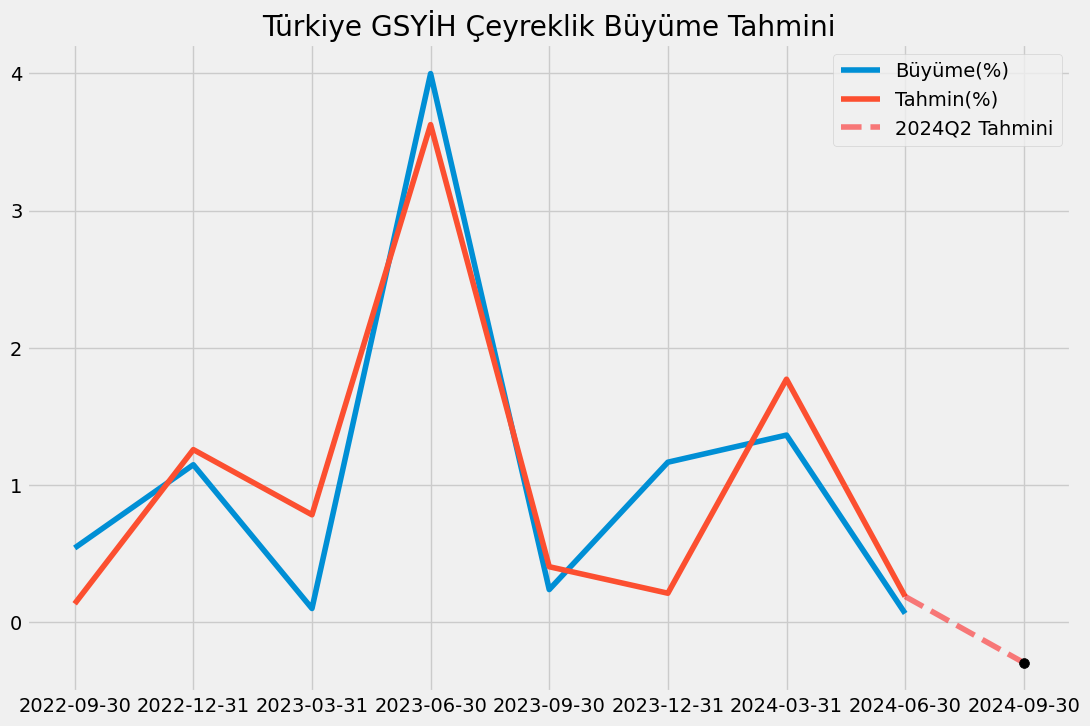

In [37]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler1["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler1["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler1["Tahmin"].iloc[-2:],"--",label="2024Q2 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler1.index[-1],y=tahminler1["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [51]:
selected_features=["İmalat PMI","İthalat","İşsizlik","Kart","M2","M3","Ticari Faiz","Sanayi","TÜFE","Tüketici Güven","ÜFE","USD/TL"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=26,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.24393371243712603)))
model.add(Dense(units=26,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.24393371243712603)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.010307800249683127)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=64,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 13.1677 - mean_squared_error: 2.8816 - val_loss: 10.5178 - val_mean_squared_error: 0.6240
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 10.9116 - mean_squared_error: 1.0179 - val_loss: 9.6036 - val_mean_squared_error: 0.1401
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 9.8712 - mean_squared_error: 0.4077 - val_loss: 9.1921 - val_mean_squared_error: 0.1934
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 9.2827 - mean_squared_error: 0.2841 - val_loss: 8.8754 - val_mean_squared_error: 0.3607
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 8.7985 - mean_squared_error: 0.2838 - val_loss: 8.4826 - val_mean_squared_error: 0.4621
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 8.3284 - mean_squared_error: 0.3079 - val_loss: 7.9666 - val_mean_squared_error: 0.4421
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 7.8414 - mean_squared_error: 0.3169 - val_loss: 7.36

In [52]:
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


,Büyüme
2022-09-30,0.174493
2022-12-31,1.116421
2023-03-31,0.383001
2023-06-30,3.162281
2023-09-30,0.213026
2023-12-31,-0.095095
2024-03-31,1.709289
2024-06-30,-0.238584
2024-09-30,-0.433919
2024-12-31,-0.222483


In [40]:
tahminler2=pd.DataFrame()
tahminler2["Büyüme"]=data["Büyüme"].iloc[-9:]
tahminler2["Tahmin"]=pred["Büyüme"]
tahminler2

,Büyüme,Tahmin
2022-09-30,0.542207,0.155538
2022-12-31,1.148543,1.153424
2023-03-31,0.101158,0.343402
2023-06-30,3.998077,3.175698
2023-09-30,0.239144,0.208762
2023-12-31,1.166981,-0.012644
2024-03-31,1.364591,1.885903
2024-06-30,0.065100,-0.122417
2024-09-30,0.000000,-0.304459


In [41]:
mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1])

0.3229868497965786

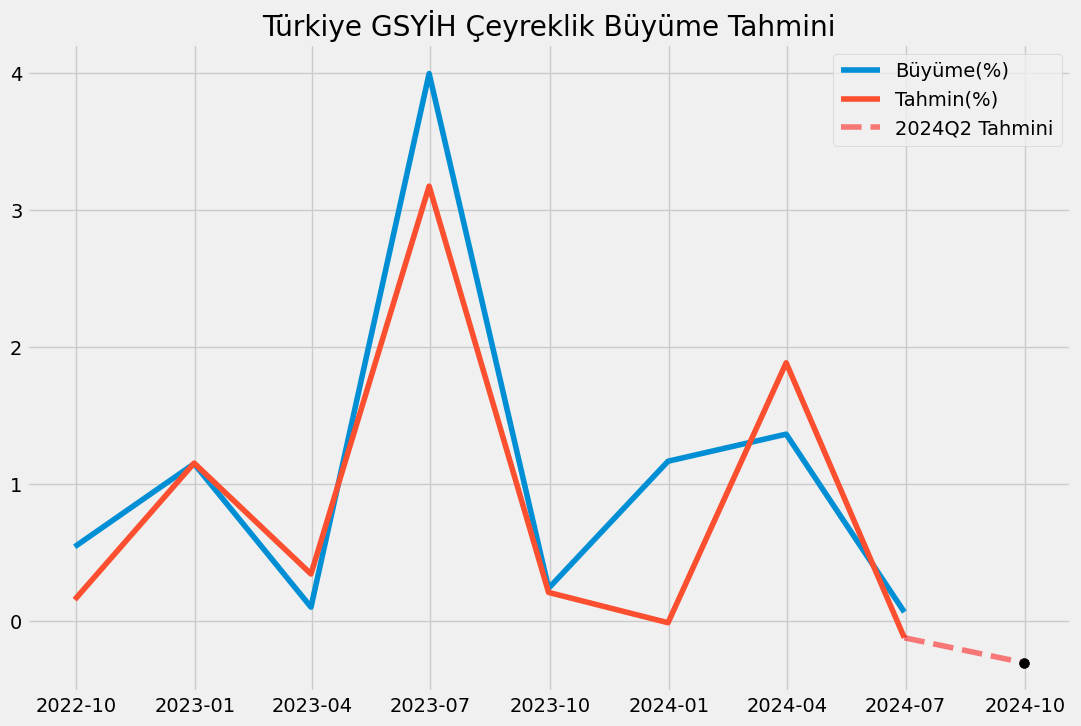

In [41]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler2["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler2["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler2["Tahmin"].iloc[-2:],"--",label="2024Q2 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler2.index[-1],y=tahminler2["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [53]:
selected_features=["İmalat PMI","İthalat","İşsizlik","Kart","M3","Mevduat Faiz 3Ay","Sanayi","Tüketici Güven","ÜFE","USD/TL"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.004411704049285289)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=31,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 40.5455 - mean_squared_error: 0.9205 - val_loss: 38.7599 - val_mean_squared_error: 1.0337
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 42.0097 - mean_squared_error: 4.2834 - val_loss: 37.0103 - val_mean_squared_error: 0.6284
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 37.6905 - mean_squared_error: 1.3085 - val_loss: 35.3681 - val_mean_squared_error: 0.3779
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 36.3945 - mean_squared_error: 1.4043 - val_loss: 34.1059 - val_mean_squared_error: 0.4887
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 34.2869 - mean_squared_error: 0.6697 - val_loss: 33.0528 - val_mean_squared_error: 0.8199
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 32.9765 - mean_squared_error: 0.7437 - val_loss: 31.5985 - val_mean_squared_error: 0.7520
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 31.7937 - mean_squared_error: 0.9472 - val_

In [54]:
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


,Büyüme
2022-09-30,0.206848
2022-12-31,1.293511
2023-03-31,0.791825
2023-06-30,3.914447
2023-09-30,0.635445
2023-12-31,0.329172
2024-03-31,2.261285
2024-06-30,-0.133435
2024-09-30,-0.268821
2024-12-31,-0.042364


In [44]:
tahminler3=pd.DataFrame()
tahminler3["Büyüme"]=data["Büyüme"].iloc[-9:]
tahminler3["Tahmin"]=pred["Büyüme"]
tahminler3

,Büyüme,Tahmin
2022-09-30,0.542207,0.228233
2022-12-31,1.148543,1.288226
2023-03-31,0.101158,0.792155
2023-06-30,3.998077,3.878491
2023-09-30,0.239144,0.613208
2023-12-31,1.166981,0.313888
2024-03-31,1.364591,2.213818
2024-06-30,0.065100,-0.135267
2024-09-30,0.000000,-0.274076


In [45]:
mean_squared_error(tahminler3["Büyüme"].iloc[:-1],tahminler3["Tahmin"].iloc[:-1])

0.27986144505154426

In [46]:


tahminler2.index=tahminler2.index.strftime("%Y-%m-%d")
tahminler3.index=tahminler3.index.strftime("%Y-%m-%d")

In [47]:
sonuç=pd.DataFrame()
sonuç=pd.concat([tahminler1["Tahmin"],tahminler2["Tahmin"],tahminler3["Tahmin"]],axis=1)
sonuç["Ortalama"]=sonuç.mean(axis=1)
sonuç["Büyüme"]=tahminler1["Büyüme"]
sonuç.index=pd.to_datetime(sonuç.index)
sonuç

,Tahmin,Tahmin,Tahmin,Ortalama,Büyüme
2022-09-30,0.135715,0.155538,0.228233,0.173162,0.542207
2022-12-31,1.258724,1.153424,1.288226,1.233458,1.148543
2023-03-31,0.783967,0.343402,0.792155,0.639841,0.101158
2023-06-30,3.626239,3.175698,3.878491,3.560143,3.998077
2023-09-30,0.405578,0.208762,0.613208,0.409183,0.239144
2023-12-31,0.212501,-0.012644,0.313888,0.171248,1.166981
2024-03-31,1.771585,1.885903,2.213818,1.957102,1.364591
2024-06-30,0.188784,-0.122417,-0.135267,-0.022966,0.065100
2024-09-30,-0.293510,-0.304459,-0.274076,-0.290682,0.000000


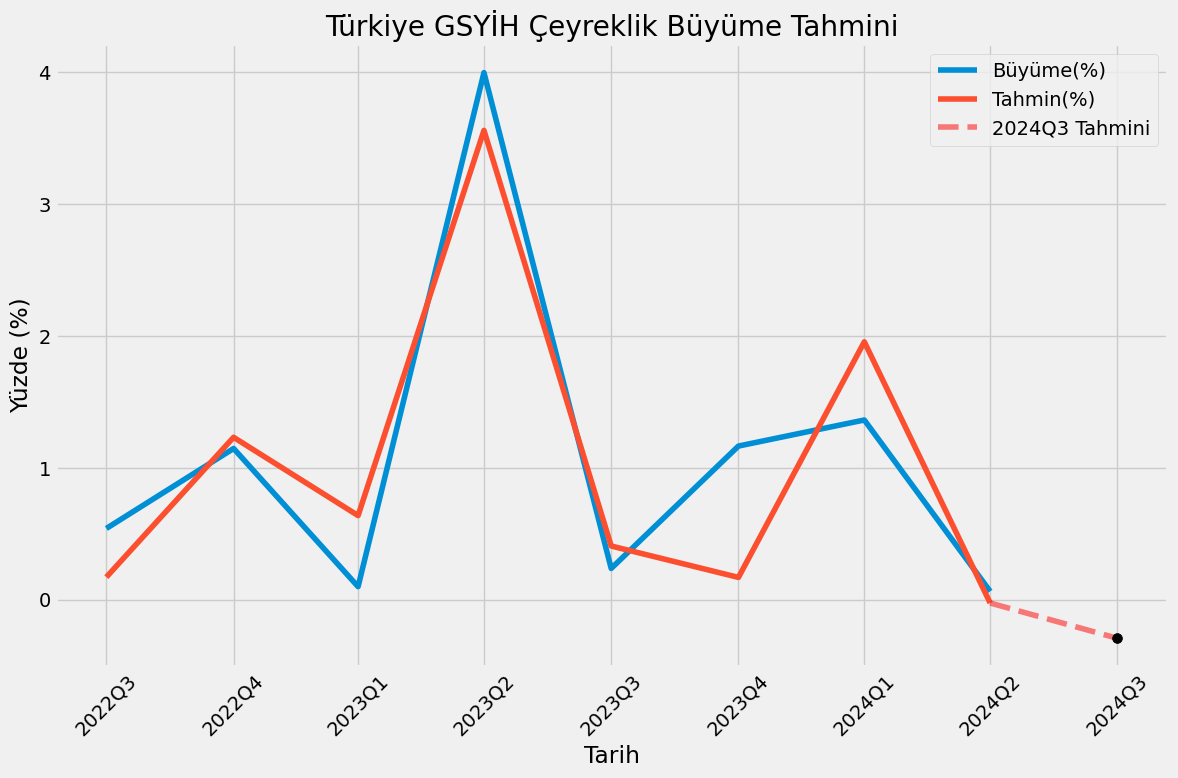

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2024Q3 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.show()


In [49]:
yıllık=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
yıllık=yıllık.iloc[6:34,14:18]


veri=[]
for i in range(len(yıllık)):
   veri.append(yıllık.iloc[i,:].values)


veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1998-03-31",freq="Q",periods=len(veri)))

In [50]:


veri.loc[pd.to_datetime("2024-09-30")]=veri["Büyüme"].iloc[-1]*(1+(sonuç["Ortalama"].iloc[-1]/100))


In [51]:
veri["Tahmin"]=0
veri["Tahmin"].loc[sonuç.index[0]]=veri.loc["2022-06-30","Büyüme"]*(1+(sonuç["Ortalama"].iloc[0]/100))
for i in range(1,len(sonuç)):
    veri["Tahmin"].loc[sonuç.index[i]]=veri.loc[sonuç.index[i-1],"Büyüme"]*(1+(sonuç["Ortalama"].iloc[i]/100))


In [52]:
veri=veri[veri["Tahmin"]!=0]
for i in range(len(veri)):
    veri["Tahmin"].iloc[i]=((veri["Tahmin"].iloc[i]/veri["Büyüme"].iloc[i-4])-1)*100


In [ ]:
veri["Büyüme"]=veri["Büyüme"].pct_change(4)*100



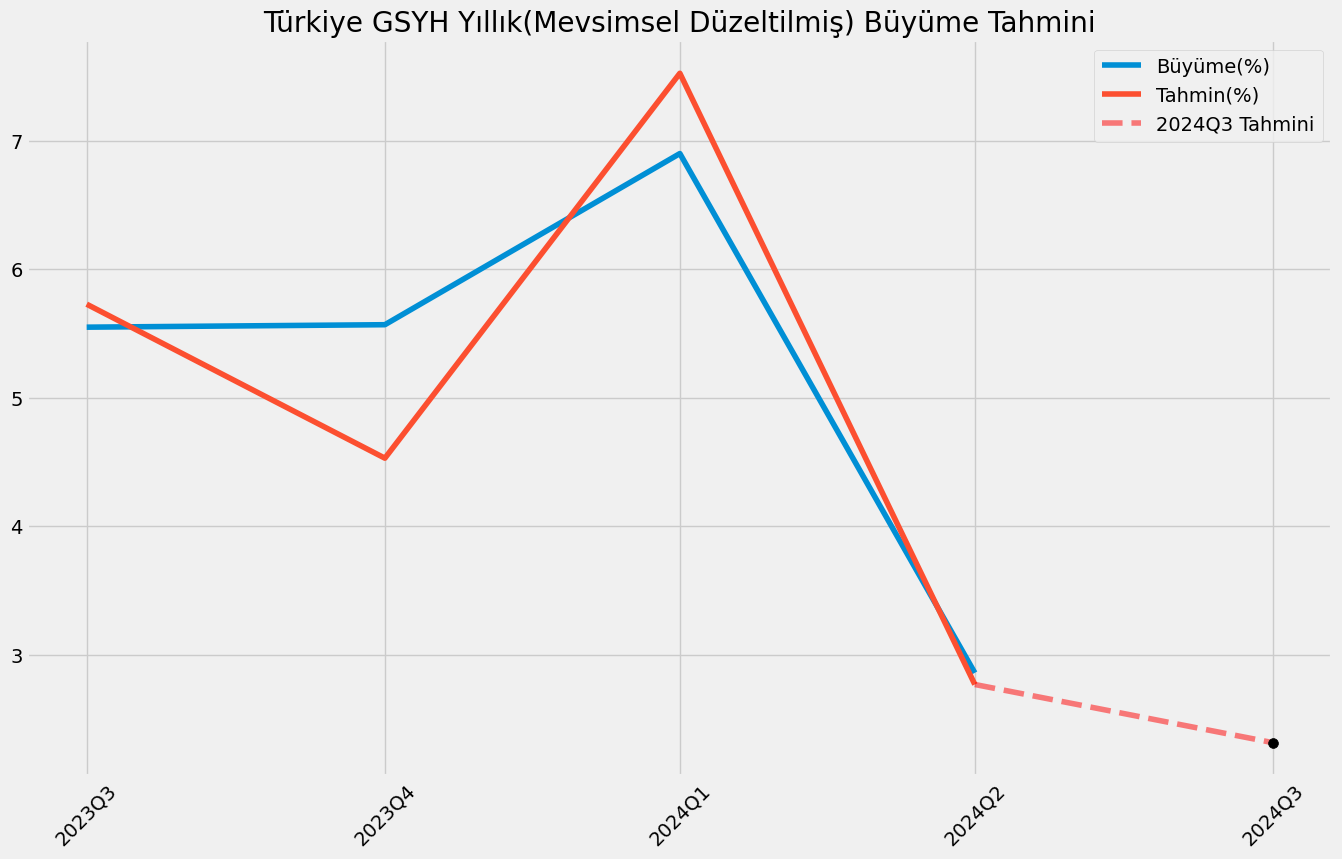

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-5:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-5:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2024Q3 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-5:]]
plt.xticks(ticks=veri.index[-5:], labels=tarihler, rotation=45)
plt.grid(True)





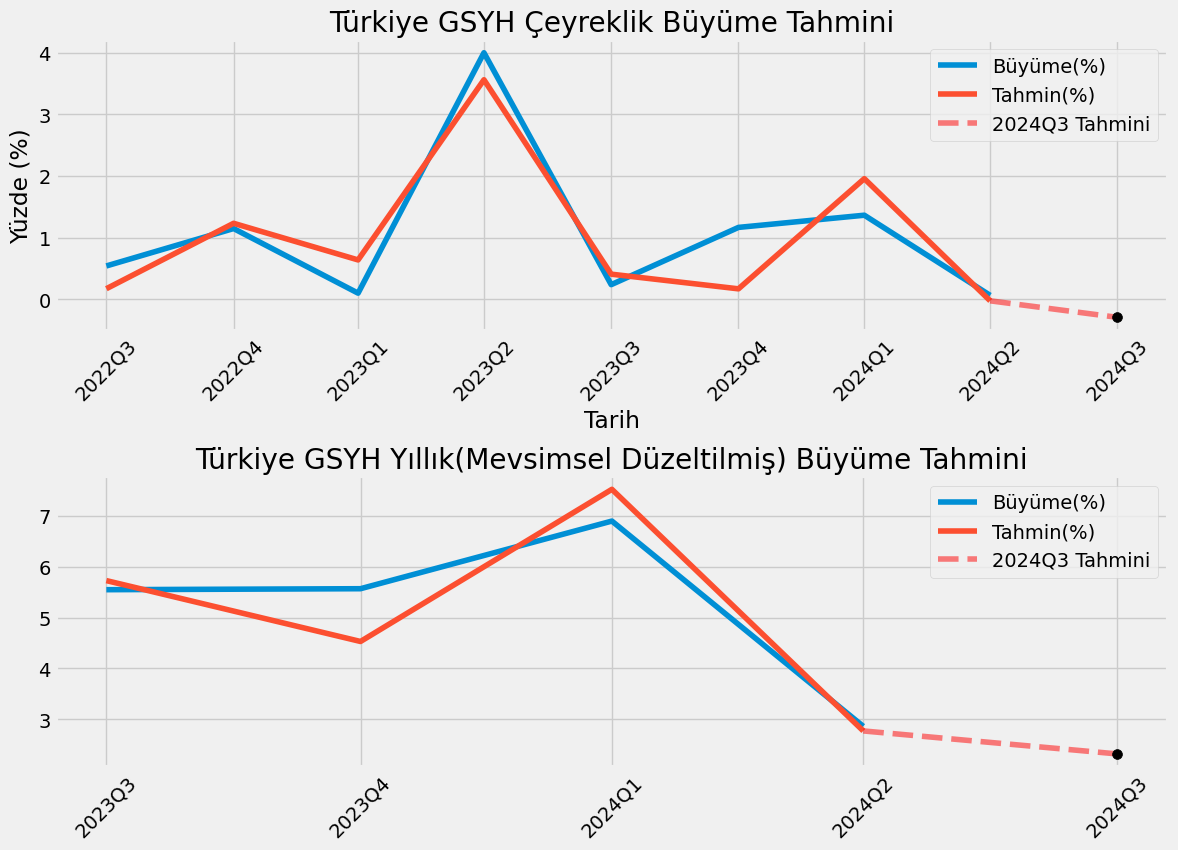

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2024Q3 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.subplot(2,1,2)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"



plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-5:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-5:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2024Q3 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-5:]]
plt.xticks(ticks=veri.index[-5:], labels=tarihler, rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.grid(True)



